<a href="https://colab.research.google.com/github/Ta2299/Ta2299/blob/main/python_sklearn_tutotrial_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tutotrial 1**

In this tutorial, we shall use famous Python packages to do basic data analysis. This includes Pandas, Sklearn and Pandas profiling package.

Run the following code to start installing Python packages.

In [ ]:
import sys
!{sys.executable} -m pip install -U pandas-profiling
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz

     |████████████████████████████████| 261 kB 5.6 MB/s 
     |████████████████████████████████| 596 kB 43.4 MB/s 
     |████████████████████████████████| 303 kB 43.3 MB/s 
     |████████████████████████████████| 3.1 MB 31.1 MB/s 
     |████████████████████████████████| 62 kB 340 kB/s 
     |████████████████████████████████| 102 kB 8.7 MB/s 
     |████████████████████████████████| 10.1 MB 36.4 MB/s 
     |████████████████████████████████| 675 kB 46.7 MB/s 
     |████████████████████████████████| 812 kB 39.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=b423e7c860fe2fbca2c4c5d3f78498d9f48c4b92dbc9b61b9464182c80321e0a
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=57985e53bd9f402cc1ef0b48c01cead301c99173b274bc8125fe45c1021e76da
  

In [ ]:
!pip install scipy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Upload your data set file to Google Drive. I am uploading german_credit.arff file. We can also uplaod the CSV file but with the CSV file, we shall have to define categorical and numeric data types correctly. In the case of arff files, I have already defined the correct data types. This means you just need to run the following code snippet to load correct data types for the three dataset in this project..

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving german_credit.arff to german_credit.arff


In [ ]:
import pandas as pd
from scipy.io import arff
import numpy as np

data_file="german_credit.arff"
# If using other datasets then comment the above line and uncomment one of the following two lines
#data_file="bank.arff"
#data_file="churn.arff"
data=arff.loadarff(data_file)

df=pd.DataFrame(data[0])
for col in df.columns:
  if df[col].dtype=='object':
    #making sure data is not read as bytes but as string values from a file
    df[col] = df[col].str.decode('utf-8')
#Look at loaded data and data types
print(df.dtypes)



Creditability                         object
Account Balance                       object
Duration of Credit (month)           float64
Payment Status of Previous Credit     object
Purpose                               object
Credit Amount                        float64
Value Savings/Stocks                  object
Length of current employment          object
Instalment per cent                  float64
Sex & Marital Status                  object
Guarantors                            object
Duration in Current address           object
Most valuable available asset         object
Age (years)                          float64
Concurrent Credits                    object
Type of apartment                     object
No of Credits at this Bank           float64
Occupation                            object
No of dependents                     float64
Telephone                             object
Foreign Worker                        object
dtype: object


In [ ]:
# Let's display first 10 records 
df.head(10)


Creditability Account Balance  ...  Telephone Foreign Worker
0             1               1  ...          1              1
1             1               1  ...          1              1
2             1               2  ...          1              1
3             1               1  ...          1              2
4             1               1  ...          1              2
5             1               1  ...          1              2
6             1               1  ...          1              2
7             1               1  ...          1              2
8             1               4  ...          1              1
9             1               2  ...          1              1

[10 rows x 21 columns]

In [ ]:
# look at meta information about data, such as null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Creditability                      1000 non-null   object 
 1   Account Balance                    1000 non-null   object 
 2   Duration of Credit (month)         1000 non-null   float64
 3   Payment Status of Previous Credit  1000 non-null   object 
 4   Purpose                            1000 non-null   object 
 5   Credit Amount                      1000 non-null   float64
 6   Value Savings/Stocks               1000 non-null   object 
 7   Length of current employment       1000 non-null   object 
 8   Instalment per cent                1000 non-null   float64
 9   Sex & Marital Status               1000 non-null   object 
 10  Guarantors                         1000 non-null   object 
 11  Duration in Current address        1000 non-null   object

In [ ]:
# Let's see meta information about numeric data, we can also see if there any extreme values
df.describe()

Duration of Credit (month)  ...  No of dependents
count                 1000.000000  ...       1000.000000
mean                    20.903000  ...          1.155000
std                     12.058814  ...          0.362086
min                      4.000000  ...          1.000000
25%                     12.000000  ...          1.000000
50%                     18.000000  ...          1.000000
75%                     24.000000  ...          1.000000
max                     72.000000  ...          2.000000

[8 rows x 6 columns]

**Added by Carolyn - added a method to find outliers

In [ ]:
import matplotlib.pyplot as plt 

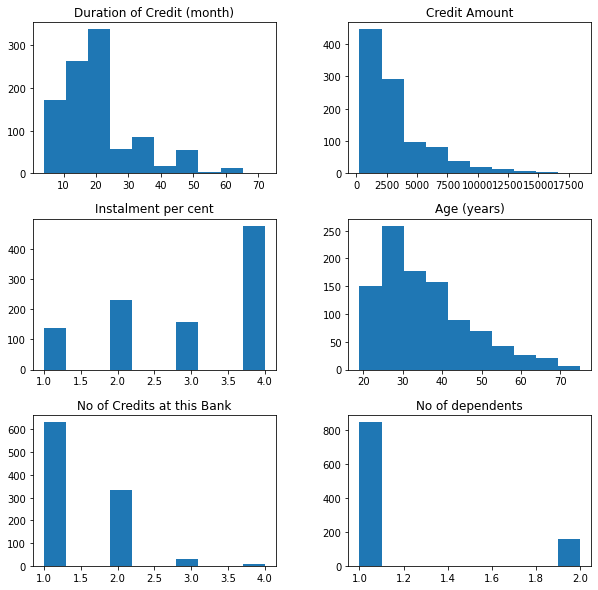

In [ ]:
# Plot histographs of the variables
df.hist(grid = False, figsize=[10,10])
plt.show()

In [ ]:
def detect_outliers(data):
  outliers=[]
  sorted(data)
  q1, q3 = np.percentile(data, [25,75])
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)
  for x in data:
    if x < lower_bound or x > upper_bound:
      outliers.append(x)
  return outliers


In [ ]:
df.columns

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')

In [ ]:
credDur = df['Duration of Credit (month)']
credAmt = df['Credit Amount']
ages = df['Age (years)']

In [ ]:
print(detect_outliers(credDur))
print(detect_outliers(credAmt))
print(detect_outliers(ages))

[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 47.0, 48.0, 60.0, 54.0, 48.0, 48.0, 60.0, 48.0, 60.0, 48.0, 48.0, 60.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 60.0, 60.0, 45.0, 48.0, 48.0, 48.0, 72.0, 48.0, 60.0, 60.0, 48.0, 60.0, 60.0, 48.0, 60.0, 48.0, 48.0, 48.0, 60.0, 45.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 60.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 45.0, 48.0, 54.0, 48.0, 45.0, 48.0, 45.0, 48.0, 48.0, 48.0]
[10875.0, 8858.0, 12749.0, 8072.0, 8487.0, 12169.0, 10722.0, 8613.0, 8588.0, 10366.0, 8133.0, 9436.0, 10477.0, 13756.0, 11760.0, 14179.0, 10974.0, 9566.0, 8358.0, 9857.0, 10222.0, 9055.0, 7966.0, 12204.0, 8229.0, 10623.0, 9277.0, 15857.0, 10144.0, 15653.0, 8335.0, 8471.0, 8947.0, 11054.0, 9157.0, 9283.0, 14555.0, 9271.0, 8386.0, 14318.0, 15672.0, 10961.0, 7980.0, 11560.0, 11328.0, 11938.0, 14782.0, 12612.0, 9398.0, 9572.0, 8065.0, 9034.0, 14027.0, 9629.0, 12976.0, 10297.0, 14421.0, 8086.0, 10127.0, 12389.0, 11590.0, 15945.0, 9960.0, 8648.0, 8318.0, 11816.0, 11998.0, 18424.

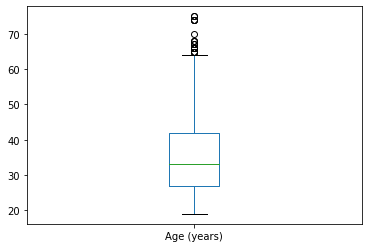

In [ ]:
df.boxplot(column=['Age (years)'], grid = False)

# Added by Carolyn: Methods Used to clean the Data

In [ ]:
from scipy import stats

In [ ]:
# First, select the final columns for the machine learning
SelectedColumns = ['Creditability', 'Account Balance','Payment Status of Previous Credit','Purpose','Value Savings/Stocks','Length of current employment',
 'Sex & Marital Status','Guarantors','Most valuable available asset','Concurrent Credits','Type of apartment','Foreign Worker',
 'Age (years)', 'Credit Amount', 'Duration of Credit (month)']

testData = df[SelectedColumns]
testData

Creditability Account Balance  ... Credit Amount Duration of Credit (month)
0               1               1  ...        1049.0                       18.0
1               1               1  ...        2799.0                        9.0
2               1               2  ...         841.0                       12.0
3               1               1  ...        2122.0                       12.0
4               1               1  ...        2171.0                       12.0
..            ...             ...  ...           ...                        ...
995             0               1  ...        1987.0                       24.0
996             0               1  ...        2303.0                       24.0
997             0               4  ...       12680.0                       21.0
998             0               2  ...        6468.0                       12.0
999             0               1  ...        6350.0                       30.0

[1000 rows x 15 columns]

In [ ]:
# Perform a MinMax scaler transform of the dataset
from sklearn.preprocessing import MinMaxScaler
colNames = testData.columns

trans = MinMaxScaler()

#df2[['Duration of Credit (month)','Credit Amount','Age (years)']] = trans.fit_transform(df2[['Duration of Credit (month)','Credit Amount','Age (years)']])
testData = trans.fit_transform(testData)

cleanData = pd.DataFrame(testData)
cleanData.columns = colNames
cleanData

Creditability  Account Balance  ...  Credit Amount  Duration of Credit (month)
0              1.0         0.000000  ...       0.043964                    0.205882
1              1.0         0.000000  ...       0.140255                    0.073529
2              1.0         0.333333  ...       0.032519                    0.117647
3              1.0         0.000000  ...       0.103004                    0.117647
4              1.0         0.000000  ...       0.105700                    0.117647
..             ...              ...  ...            ...                         ...
995            0.0         0.000000  ...       0.095576                    0.294118
996            0.0         0.000000  ...       0.112964                    0.294118
997            0.0         1.000000  ...       0.683944                    0.250000
998            0.0         0.333333  ...       0.342137                    0.117647
999            0.0         0.000000  ...       0.335644                    0.382353

[1000 rows x 15 columns]

In [ ]:
# Balance the data for training by randomly selecting 300 rows where credibility is good (= 1).
#creditGood = cleanData[cleanData.Creditability == 1.0]
#creditBad = cleanData[cleanData.Creditability == 0.0]

#creditGood = creditGood.sample(n=len(creditBad.index))
#frames = [creditGood,creditBad]
#trainingData = pd.concat(frames)
#trainingData

# *There are two sections in this tutorial. First section only works if data already has numeric encoding, and second section converts any categorical values (e.g., string values) to numeric encoding. German Credit card data set would work in both sections and other datasets would require their string values to be encoded into numeric first, so they will work with only Section 2.* 

# Section 1
### Test Section 1 with only German credit card dataset.


**Let's develop a decison tree in Python**

In [ ]:
# First split the data into train and test set
from sklearn.model_selection import train_test_split

#df=cleanData  #ellie added

# Split dataset into training set and test set
# Our class column is Creditability here and everything else will be used as features 
class_col_name='Creditability' 

feature_names=cleanData.columns[cleanData.columns != class_col_name ]
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(cleanData.loc[:, feature_names], cleanData[class_col_name], test_size=0.3,random_state=1) 

NameError: ignored

Below is the code to train the decision tree. I am setting max depth of the tree to 5, you can choose to change it or remove it.

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=4) #trying dif #s
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


In [ ]:
#test code to view variable importance
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

feature  importance
0                     Account Balance       0.466
13         Duration of Credit (month)       0.184
1   Payment Status of Previous Credit       0.090
2                             Purpose       0.060
12                      Credit Amount       0.060
3                Value Savings/Stocks       0.057
11                        Age (years)       0.044
8                  Concurrent Credits       0.028
4        Length of current employment       0.012
5                Sex & Marital Status       0.000
6                          Guarantors       0.000
7       Most valuable available asset       0.000
9                   Type of apartment       0.000
10                     Foreign Worker       0.000

If you want to learn more about any Python statement just use help function; e.g., here  I am displaying help on decision tree

In [ ]:
help(tree.DecisionTreeClassifier)

Let's plot the ree using the following code. Here I am just passing feature_names, tree model (clf) and class values to the grpahviz function.

class Names ['1' '0']


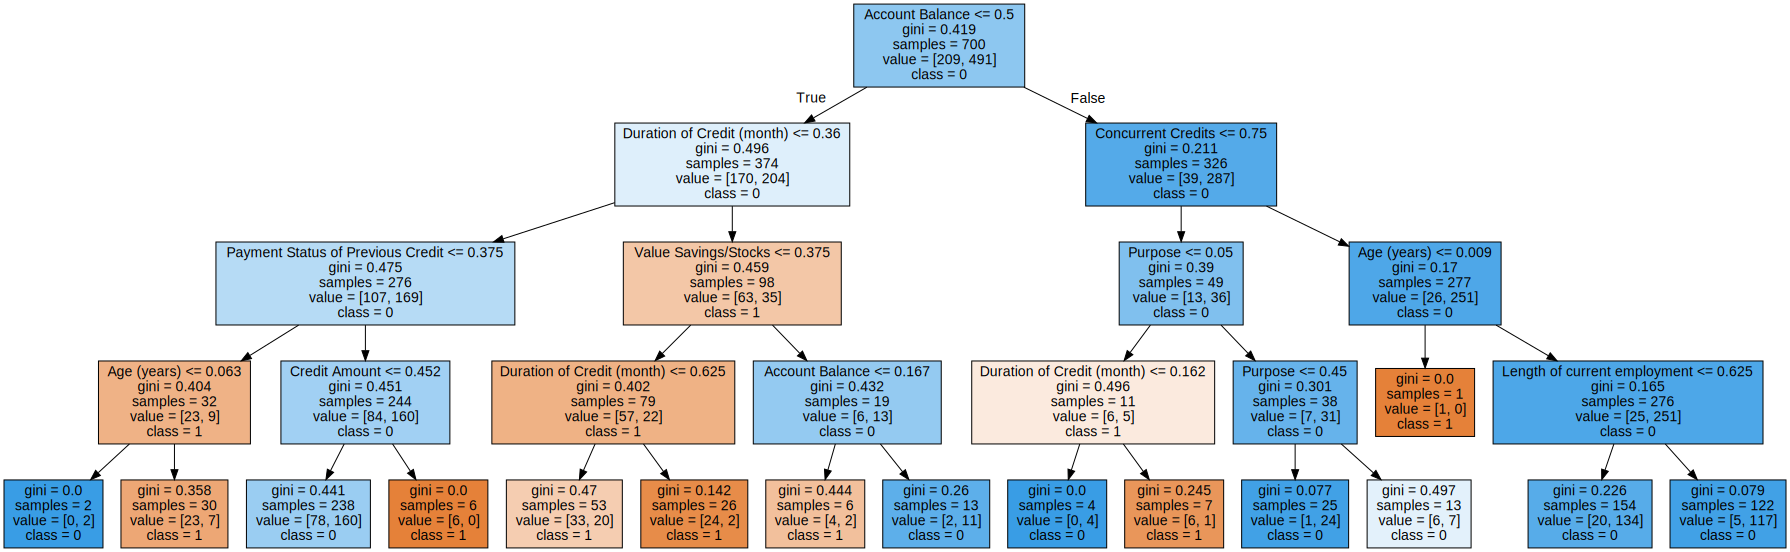

In [ ]:
import graphviz
#Get unique class values to display on the tree
class_values=df[class_col_name].unique()
print ("class Names",class_values)


dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=class_values,
                                filled=True)
# Plot tree
graph = graphviz.Source(dot_data, format="png") 
graph



In the tree above, decsion tree used the categorical attribute as numeric attribute and generated results. This is because values in each of the categorical attribute was already encoded as numbers (1,2,3...etc.). This type of categorical encoding to numeric values is called Label encoding. It is valid to use this sort of method but it has a disadvantage that higher number could mean bigger weight for a value but it may just be a different value. We shall see another method to avoid this below. If we had strings in values, then the above code would have generated an error. Recall that decision tree algorithm can handle categorical and numerical data but Sklearn's implementation can only handle numeric data types. So it is not a comprehensive implementation of decision tree. 

In [ ]:
# Let's make the prdictions on the test set  that we set aside earlier using the trained tree
y_pred = clf.predict(X_test)


Time to get rid of any confusion about prediction accuracy and print our confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 32  59]
 [ 17 192]]
TP:  192 , FP:  59 , TN:  32 , FN: 17


In [ ]:
#print precision, recall, and accuracy from the perspective of each of the class (0 and 1 for German dataset)
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.65      0.35      0.46        91
         1.0       0.76      0.92      0.83       209

    accuracy                           0.75       300
   macro avg       0.71      0.64      0.65       300
weighted avg       0.73      0.75      0.72       300



**In a similar way, we can train and test Naive Bayes**

Multinomial Naive Bayes is the Naive Bayes type we studied in the class. Recall that the NB that we studied measures the conditional probabilites of words by using their counts/frequencies in each document . In the lab 6, you used CountVectorizer class in Sklearn pacakge to convert documents and words into a table/matrix where each column represented a word and each row represented a document. In the case of the dataset that we are using now, it is already in the form of a table/matrix. Each row represents one record (a kinda document) and each column represents one attribute (a kinda word). After the matrix of frequencies, remaining process is the same.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)

In [ ]:
print ("Total Columns (including class)",len(df.columns))

Total Columns (including class) 21


Let's understand our Naive Bayes model

In [ ]:
print("Number of features used ",nb.n_features_in_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  14
Classes  [0. 1.]
Number of records for classes  [209. 491.]
Log prior probability for classes  [-1.20874608 -0.35463621]
Log conditional probability for each feature given a class
 [[-2.80590632 -2.22421458 -2.84737957 -3.33380393 -2.24852517 -2.23151921
  -4.16142902 -2.26128332 -1.88028426 -2.40566315 -5.35535149 -2.90465432
  -3.18896827 -2.78769088]
 [-2.18721272 -2.12227492 -3.02740067 -2.85045996 -2.23046712 -2.28092673
  -4.322498   -2.60230872 -1.88250391 -2.48452569 -4.71454009 -2.91283029
  -3.61836133 -3.2434181 ]]


In [ ]:
X_test.columns

Index(['Account Balance', 'Payment Status of Previous Credit', 'Purpose',
       'Value Savings/Stocks', 'Length of current employment',
       'Sex & Marital Status', 'Guarantors', 'Most valuable available asset',
       'Concurrent Credits', 'Type of apartment', 'Foreign Worker',
       'Age (years)', 'Credit Amount', 'Duration of Credit (month)'],
      dtype='object')

Again just like decsion tree, NB here used the label encoding (categories to ordinal values) as numerical values to measure log probabilities. This means, it used different values of each feature as frequencies which semantically may or may not be correct, as a higher value (like 2 ,3 and more) would mean more weight. We can solve this using one-hot encoding later but some people use this form of encoding in practice too. For now, let's see classification report.

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      0.02      0.04        91
         1.0       0.70      1.00      0.82       209

    accuracy                           0.70       300
   macro avg       0.85      0.51      0.43       300
weighted avg       0.79      0.70      0.59       300



In [ ]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[  2  89]
 [  0 209]]
TP:  209 , FP:  89 , TN:  2 , FN: 0


In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
NB =RandomForestClassifier()
NB = NB.fit(X_train, y_train)
print("Successfuly trained the Naive Bayes model...")

Successfuly trained the Naive Bayes model...


In [ ]:
#test code to view variable importance naive bayes
 
feature_importances=pd.DataFrame({'features':X_train.columns,'feature_importance':np.round(NB.feature_importances_, 3)})
feature_importances.sort_values('feature_importance',ascending=False)



features  feature_importance
12                      Credit Amount               0.160
11                        Age (years)               0.128
0                     Account Balance               0.122
13         Duration of Credit (month)               0.121
2                             Purpose               0.081
1   Payment Status of Previous Credit               0.074
4        Length of current employment               0.069
3                Value Savings/Stocks               0.054
7       Most valuable available asset               0.053
5                Sex & Marital Status               0.045
9                   Type of apartment               0.034
8                  Concurrent Credits               0.029
6                          Guarantors               0.026
10                     Foreign Worker               0.005

In [ ]:
from sklearn.naive_bayes import CategoricalNB
cnb = CategoricalNB()
cnb.fit(X_train, y_train)
y_pred_cnb = cnb.predict(X_test)

In [ ]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(cnb, X_test, y_test)
importances1 = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances1)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances1[indices[f]]))

Feature ranking:
1. Account Balance (0.034667)
2. Concurrent Credits (0.014000)
3. Most valuable available asset (0.008667)
4. Length of current employment (0.004000)
5. Foreign Worker (0.003333)
6. Payment Status of Previous Credit (0.002000)
7. Type of apartment (0.001333)
8. Duration of Credit (month) (0.000000)
9. Credit Amount (0.000000)
10. Age (years) (0.000000)
11. Guarantors (0.000000)
12. Sex & Marital Status (0.000000)
13. Value Savings/Stocks (-0.003333)
14. Purpose (-0.004000)


In [ ]:
X_test.columns

Index(['Account Balance', 'Payment Status of Previous Credit', 'Purpose',
       'Value Savings/Stocks', 'Length of current employment',
       'Sex & Marital Status', 'Guarantors', 'Most valuable available asset',
       'Concurrent Credits', 'Type of apartment', 'Foreign Worker',
       'Age (years)', 'Credit Amount', 'Duration of Credit (month)'],
      dtype='object')

# Section 2: Categorical to One-Hot (numeric) Encoding 
# This section works with all datasets
Now, let's try to create on-hot-encoding of categorical variables--i.e., each value in a categorical variable will become a variable itself and its value will be 1 or 0. This way we can encode categorical data into numerical features. More here: https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/

In [ ]:
#Let's create a list for our categorical columns for German dataset, we need this later
# for German Credit card
cat_cols=["Account Balance","Payment Status of Previous Credit","Purpose","Value Savings/Stocks","Length of current employment","Sex & Marital Status"\
          ,"Guarantors","Duration in Current address","Most valuable available asset","Concurrent Credits","Type of apartment","Occupation", \
          "Telephone","Foreign Worker"]
#*******
#for bank dataset uncomment following line
#cat_cols=["job","marital","education","default","housing","loan","contact","month","poutcome"]
#*******
#*******
# for Churn data set uncomment following line
#cat_cols=["State","Area Code", "Phone Number", "Inter Plan","VoiceMail Plan"]
#******


In [ ]:
# Create a copy of the data frame in memory with a different name
df_onehot=df.copy()
#convert only categorical variables/features to dummy/one-hot features
df_onehot = pd.get_dummies(df, columns=cat_cols, prefix = cat_cols)
#print the dataset
df_onehot.columns


Index(['Creditability', 'Duration of Credit (month)', 'Credit Amount',
       'Instalment per cent', 'Age (years)', 'No of Credits at this Bank',
       'No of dependents', 'Account Balance_1', 'Account Balance_2',
       'Account Balance_3', 'Account Balance_4',
       'Payment Status of Previous Credit_0',
       'Payment Status of Previous Credit_1',
       'Payment Status of Previous Credit_2',
       'Payment Status of Previous Credit_3',
       'Payment Status of Previous Credit_4', 'Purpose_0', 'Purpose_1',
       'Purpose_10', 'Purpose_2', 'Purpose_3', 'Purpose_4', 'Purpose_5',
       'Purpose_6', 'Purpose_8', 'Purpose_9', 'Value Savings/Stocks_1',
       'Value Savings/Stocks_2', 'Value Savings/Stocks_3',
       'Value Savings/Stocks_4', 'Value Savings/Stocks_5',
       'Length of current employment_1', 'Length of current employment_2',
       'Length of current employment_3', 'Length of current employment_4',
       'Length of current employment_5', 'Sex & Marital Status_1',


In [ ]:
####
## For Bank data set only
####
# in the case of bank data set, pdays and balance columns have negative values. Those columns won't work with Naive Bayes. So run the following
# line of code for bank data set to make negative values to 0. Note that it is not necessary for decision tree to remove negative values.
#df_onehot["pdays"]=df_onehot["pdays"].apply(lambda x: 0 if x<0 else x)
#df_onehot["balance"]=df_onehot["balance"].apply(lambda x: 0 if x<0 else x)


In [ ]:
#Repeat the train test set split
from sklearn.model_selection import train_test_split
class_col_name="Creditability"
# Uncomment following line for class name for bank dataset
# class_col_name="y"
# Uncomment following line for class name for Churn dataset
#class_col_name="Churn"
one_hot_feature_names=df_onehot.columns[df_onehot.columns != class_col_name]
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_onehot.loc[:, one_hot_feature_names], df_onehot[class_col_name], test_size=0.3,random_state=109) # 70% training and 30% test

In [ ]:
# Repeat Naive Bayes modeling
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)
print ("Succesfully done..")

Succesfully done..


Let's look at Naive Bayes output

In [ ]:
print("Number of features used ",nb.n_features_in_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  64
Classes  ['0' '1']
Number of records for classes  [205. 495.]
Log prior probability for classes  [-1.22807036 -0.34652257]
Log conditional probability for each feature given a class
 [[ -5.07717035  -0.02043849  -7.11378092  -4.73218569  -7.94918926
   -8.1045397   -9.0550218   -9.30014426 -11.1789151  -10.05044985
  -10.6323714  -10.5810781   -8.84942256 -10.53228794  -9.96589246
   -9.46593651 -11.09190373 -11.96737246  -9.86323831  -9.77014789
  -12.47819809 -11.3795858  -10.80422166 -12.8836632  -10.53228794
   -8.55292986 -10.5810781  -11.3795858  -11.78505091 -10.44131616
  -10.74359703  -9.72666278  -9.32831514 -10.24460587  -9.70560937
  -10.74359703  -9.17009113  -9.01246219 -10.93775305  -8.33506336
  -11.09190373 -11.63090023 -10.31871384  -9.37211776  -9.96589246
   -9.20736252  -9.81561026  -9.68499008  -9.34270387  -9.70560937
   -9.93922422 -10.86876018  -8.53338526  -9.60651846  -8.74849664
  -10.175613   -12.19051602  -9.81561026  -8.7727893

We have probailities of a lot more features now.

See evaluation metrics below.

In [ ]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 50  45]
 [ 61 144]]
TP:  144 , FP:  45 , TN:  50 , FN: 61


In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.45      0.53      0.49        95
           1       0.76      0.70      0.73       205

    accuracy                           0.65       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.66      0.65      0.65       300



**Let's run decision tree on one-hot encoded data**

class Names ['1' '0']


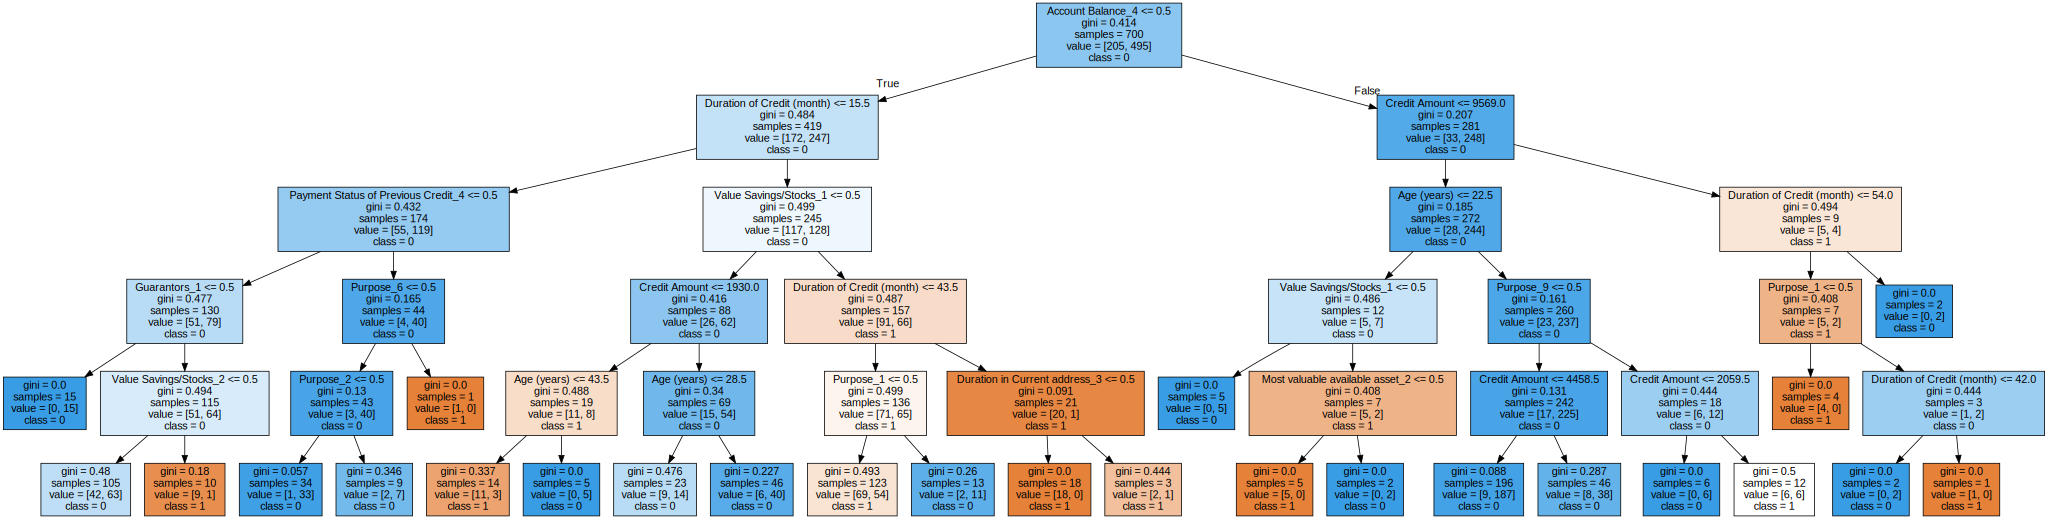

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
import graphviz
#Get unique class values to display on the tree
class_values=df_onehot[class_col_name].unique()
print ("class Names",class_values)

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=one_hot_feature_names,  
                                class_names=class_values,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


In [ ]:
# Perform prediction on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Get classification report
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.50      0.52      0.51        95
           1       0.77      0.76      0.77       205

    accuracy                           0.68       300
   macro avg       0.64      0.64      0.64       300
weighted avg       0.69      0.68      0.68       300



**Appendix**

**Exploratory Analysis**

We have learnt how to implement classification algorithms in Python but we have just done basic exploratory data analysis in the beginning using info function, describe function,and  head function of Pandas. Here is a very good Python pacakge that performs varirty of the basic analysis by itself and generates a report for you. You can analyze mising values, dupicate values, correlation, etc.


In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

After you have performed exploratory analysis and determined the features or rows you would like to remove (if any) then you can use simple pandas statements to select a subset of data frame. Here is the documentation: https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html. For example, if you want to drop a column name "Phone Number" then you can use: 

df=df.drop(columns=['Phone Number'])

Learning Pandas will be useful for you in the long run as it is used everywhere in data science world. After doing any feature selection (or fitering of rows) you can run the above decision tree and Naive Bayes models again for comparison with original data.



```
For CIND 119 course at Ryerson
  by Syed Shariyar Murtaza,Ph.D.
```

